# Imports

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mayavi import mlab
import mayavi
import cv2
import matplotlib.image as mpimg

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

cwd = os.getcwd()

********************************************************************************
         to build the TVTK classes (6.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



# Load a .npy file, the path here is harcoded

In [2]:
#load all the frames
all_frames = np.asarray(np.load(cwd + "/out_bagging.bag_format_XYZIR.npy"))

In [3]:
print(len(all_frames), len(all_frames[0]))

118 31492


# Extract the values in the 85th frame, both vehicles are visible in this frame, here it is coloured based on the corresponding intensity values


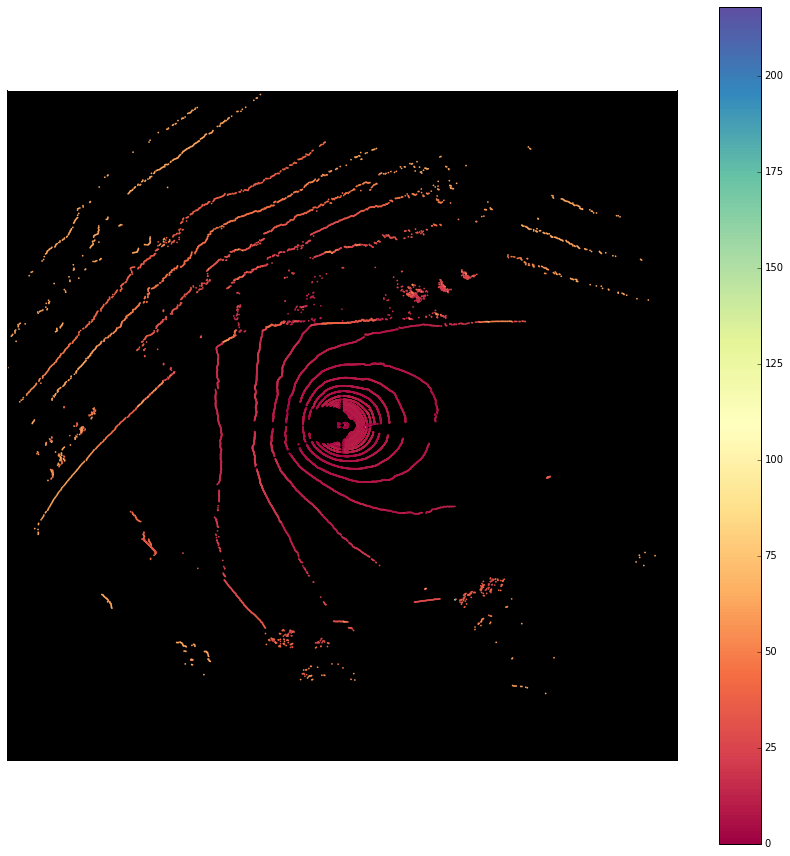

In [4]:
%matplotlib inline

sample = np.asarray(all_frames[85])

x_s = []
y_s = []
z_s = []
i_s = []
r_s = []
for x,y,z,i,r in all_frames[0]:
    if abs(x) <= 100 and abs(y) <=100:
        x_s.append(x)
        y_s.append(y)
        z_s.append(z)
        i_s.append(i)
        r_s.append(r)

# print "Top Down Plot coloured based on intensity"

fig = plt.figure(frameon = False, figsize=(15,15))
cm = plt.cm.get_cmap('Spectral')
sc = plt.scatter(x_s, y_s, c=i_s, s=3, edgecolors= '', cmap=cm)
plt.axis('square')
ax = plt.gca()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.patch.set_facecolor('black')
ax.set_xlim([-100,100])
ax.set_ylim([-100,100])
plt.colorbar(sc)
plt.show()

# Here is check for the limits of each type in the frame

In [5]:
print ("x-axes limits: ", min(x_s), max(x_s), len(x_s))
print ("y-axes limits: ", min(y_s), max(y_s), len(y_s))
print ("z-axes limits: ", min(z_s), max(z_s), len(z_s))
print ("i-axes limits: ", min(i_s), max(i_s), len(i_s))
print ("r-axes limits: ", min(r_s), max(r_s), len(r_s))

x-axes limits:  -99.8033447266 93.5088653564 31474
y-axes limits:  -80.0927124023 99.8018951416 31474
z-axes limits:  -29.1739044189 15.632021904 31474
i-axes limits:  0.0 218.0 31474
r-axes limits:  0 31 31474


# A Function to reset back to the original values as we will be messing around with them, useful to have around

In [6]:
#keep values
x_s2 = x_s[:]
y_s2 = y_s[:]
z_s2 = z_s[:]
i_s2 = i_s[:]
r_s2 = r_s[:]

def reset_points():
    global x_s
    global y_s
    global z_s
    global i_s
    global r_s
    global x_s2
    global y_s2
    global z_s2
    global i_s2
    global r_s2
    #run this reset them
    x_s = x_s2[:]
    y_s = y_s2[:]
    z_s = z_s2[:]
    i_s = i_s2[:]
    r_s = r_s2[:]

In [7]:
reset_points()

## Something wrong right?

### If you noticed in Rviz or Mayavi, if you turn on the plane, you'll see it's on top of the car where the sensor is, so I tried to take the ground reference from below zero...
![Car height image](http://www.jpk.ie/db/Gallery/Gallery-Images/Vehicles.jpg?ImageStamp=36748)

# Reset the points and experiment to find the correct height range to use

In [8]:
reset_points()
print ("x-axes limits: ", min(x_s), max(x_s), len(x_s))
print ("y-axes limits: ", min(y_s), max(y_s), len(y_s))
print ("z-axes limits: ", min(z_s), max(z_s), len(z_s))
print ("i-axes limits: ", min(i_s), max(i_s), len(i_s))
print ("r-axes limits: ", min(r_s), max(r_s), len(r_s))


x-axes limits:  -99.8033447266 93.5088653564 31474
y-axes limits:  -80.0927124023 99.8018951416 31474
z-axes limits:  -29.1739044189 15.632021904 31474
i-axes limits:  0.0 218.0 31474
r-axes limits:  0 31 31474


# Interactive sliders for experimentation, notebook is unstable you may need to run this cell multiple times for the plot to appear,  also make sure to copy any value to the following cell in case this cell resets

<IPython.core.display.Javascript object>


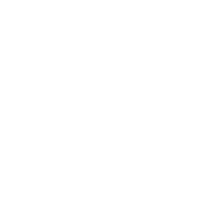

<IPython.core.display.Javascript object>


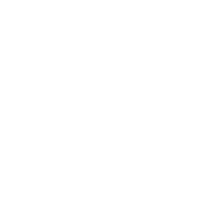

In [18]:
%matplotlib notebook

def interaction(h=16,l=-30):
    
    global x_s
    global y_s
    global z_s
    global i_s
    global r_s
    
    reset_points()
    
    del_indeces = []
    del_count = 0
    for i in range(len(z_s)):
        if z_s[i] > h or z_s[i] < l:
            del_indeces.append(i-del_count)
            del_count += 1

    for index in del_indeces:
        del z_s[index], x_s[index], y_s[index], i_s[index], r_s[index]

    fig = plt.figure(frameon = False, figsize=(3,3))
    cm = plt.cm.get_cmap('Spectral')
    sc = plt.scatter(x_s, y_s, c=z_s, s=3, edgecolors= '', cmap=cm)
    plt.axis('square')
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.patch.set_facecolor('black')
    ax.set_xlim([-30,30])
    ax.set_ylim([-30,30])
    plt.colorbar(sc)
    plt.show()
#     plt.clf()
    
interact(interaction, h=(-30,16), l=(-30,16))

## Works now!

### Although it seems the lidar or the whole car is slanted to it's left side, because the ground rings disappear gradually to the left

### Copy over the slider values to the below function, to perform the height threshold and to visualise in 2d and 3d

# Here we are also saving the plot in order to extract images from it, changing the dpi will only change the sharpness of the image and not it's resolution

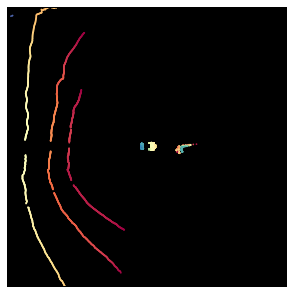

In [9]:
#done this way because del_ rearranges the array, error will be: Error: out of index!
reset_points()
del_indeces = []
del_count = 0

# print(len(z_s))

for i in range(len(z_s)):
    if z_s[i] > 0.8 or z_s[i] < -1.3:
        del_indeces.append(i-del_count)
        del_count += 1
        
for index in del_indeces:
    del z_s[index], x_s[index], y_s[index], i_s[index], r_s[index]

# plt.clf()

%matplotlib inline

fig = plt.figure(frameon = False, figsize=(5,5))
cm = plt.cm.get_cmap('Spectral')
sc = plt.scatter(x_s, y_s, c=z_s, s=3, edgecolors= '', cmap=cm)
# plt.axis('square')
ax = plt.gca()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.patch.set_facecolor('black')
ax.set_xlim([-30,30])
ax.set_ylim([-30,30])
# plt.colorbar(sc)
plt.savefig("croppable_img.png", bbox_inches='tight', dpi=200, pad_inches=0.0)
plt.show()

In [57]:
fig = mayavi.mlab.figure(bgcolor=(0, 0, 0), size=(500, 500))

mayavi.mlab.points3d(x_s, y_s, z_s,
                     z_s, # distance values for color
                     mode="point",
                     colormap='spectral',
                     figure=fig,
                     )
mayavi.mlab.show()

# Extracting image features, Here we read the image we previously saved and make a second copy for experimentation

(775, 775, 3)


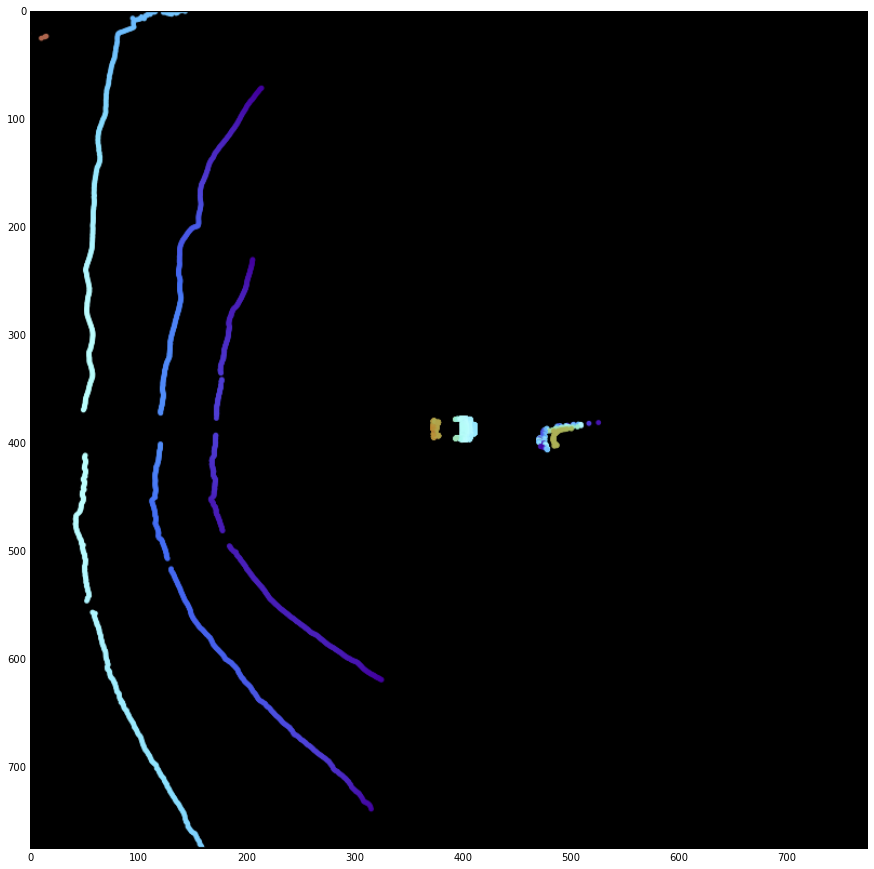

In [10]:
croppable_img = cv2.imread("croppable_img.png")
croppable_img2 = cv2.imread("croppable_img.png")
print(croppable_img.shape)
plt.figure(figsize=(15,15))
plt.imshow(croppable_img)

# (skip this) Randomly selected size for a grid size in searching for pedestrians, un-researched 

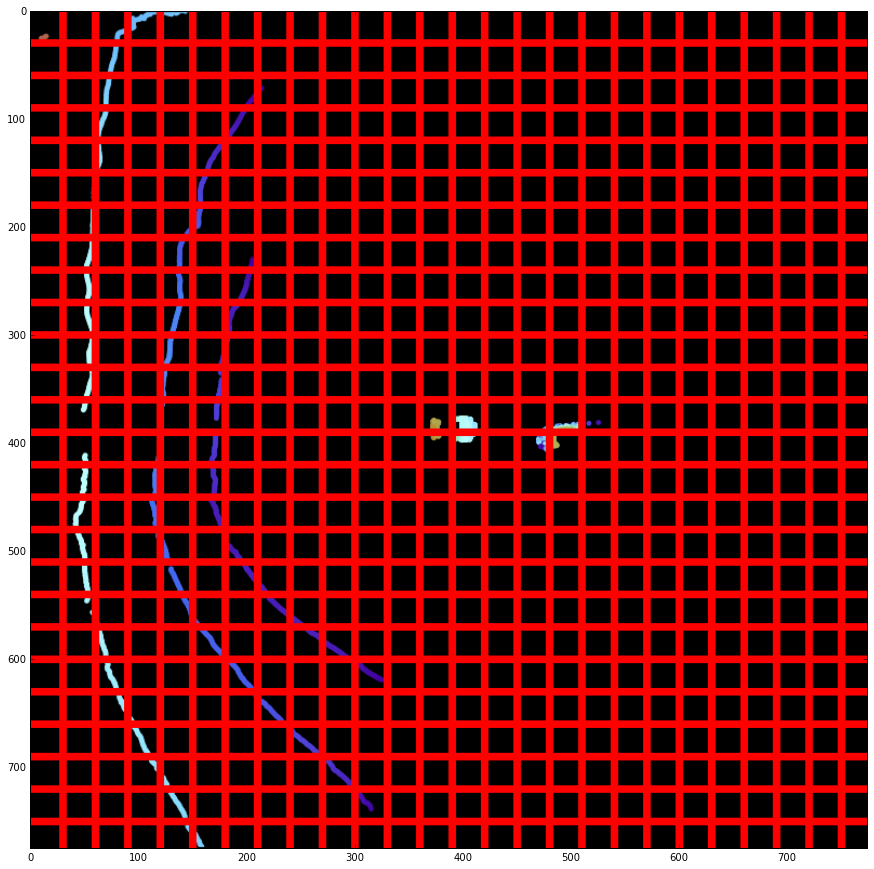

In [11]:
#grid size for person?
def grid_img(img, size):
    step = size
    while(step < img.shape[1]):
        cv2.line(img,(step,0),(step,img.shape[0]),(255,0,0),5)
        step += size
    step=size
    while(step < img.shape[0]):
        cv2.line(img,(0,step),(img.shape[1],step),(255,0,0),5)
        step += size
croppable_img1 = croppable_img
grid_img(croppable_img1,30)
plt.figure(figsize=(15,15))
plt.imshow(croppable_img1)

# Randomly selected size for a grid size in searching for cars 

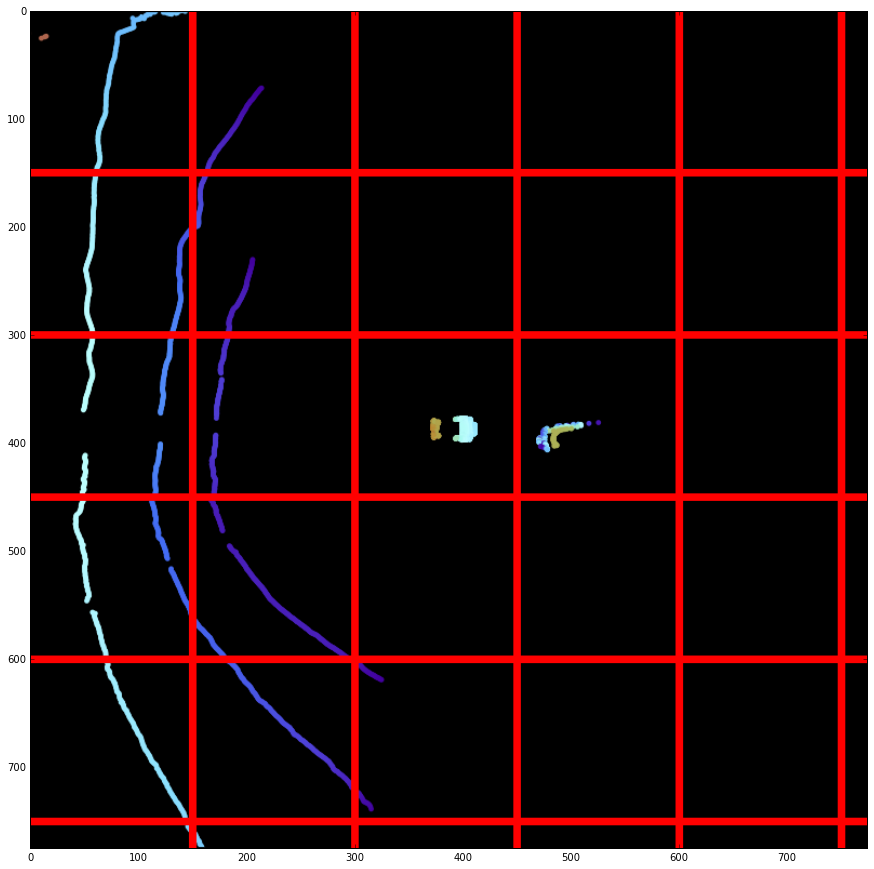

In [12]:
#grid size for car?
def grid_img(img, size):
    step = size
    while(step < img.shape[1]):
        cv2.line(img,(step,0),(step,img.shape[0]),(255,0,0),5)
        step += size
    step=size
    while(step < img.shape[0]):
        cv2.line(img,(0,step),(img.shape[1],step),(255,0,0),5)
        step += size
        
grid_img(croppable_img2,150)
plt.figure(figsize=(15,15))
plt.imshow(croppable_img2)

# Time to try automating this...

## Within the folder you put this notebook place the .npy file

## Create a folder called data and inside it a cars and notcars folder for later sorting

## this will extract all the frames to the data folder

## all the frames will be cropped and the cropped images will be dropped in the data folder for you to sort through, pick out the cars, and throw the rest into notcars

## there should've been a non-zero check..but ohwell

# > Replaced with npy2images.py in the repo


In [14]:
# img_count = 0
# for frame in all_frames:
#     img_count += 1
#     #Extract the points
#     x_s = []
#     y_s = []
#     z_s = []
#     i_s = []
#     r_s = []
#     for x,y,z,i,r in frame:
#         if abs(x) <= 25 and abs(y) <=25:
#             x_s.append(x)
#             y_s.append(y)
#             z_s.append(z)
#             i_s.append(i)
#             r_s.append(r)
            
#     #Filter on a height limit
#     del_indeces = []
#     del_count = 0

#     for i in range(len(z_s)):
#         if z_s[i] > 0.8 or z_s[i] < -1.30:
#             del_indeces.append(i-del_count)
#             del_count += 1

#     for index in del_indeces:
#         del z_s[index], x_s[index], y_s[index], i_s[index], r_s[index]
    
#     #Image setup, plot, and save as full frame under the bag file's name
#     fig = plt.figure(frameon = False, figsize=(15,15))
#     cm = plt.cm.get_cmap('Spectral')
#     sc = plt.scatter(x_s, y_s, c=z_s, s=3, edgecolors= '', cmap=cm)
#     # plt.axis('square')
#     ax = plt.gca()
#     ax.axes.get_xaxis().set_visible(False)
#     ax.axes.get_yaxis().set_visible(False)
#     ax.patch.set_facecolor('black')
#     ax.set_xlim([-30,30])
#     ax.set_ylim([-30,30])
#     # plt.colorbar(sc)
#     cwd = os.getcwd()
#     directory = cwd + "/approach_1_velo_images"
#     if not os.path.exists(directory):
#         os.makedirs(directory)
#     plt.savefig((directory + "/img_" + str(img_count) + ".png"), bbox_inches='tight', dpi=200, pad_inches=0.0)
    
#     #Load the image again for cropping
#     croppable_img = cv2.imread(directory + "/img_" + str(img_count) + ".png")
    
#     #ysize
#     ysize = croppable_img.shape[0]
#     #xsize
#     xsize = croppable_img.shape[1]
#     #step size
#     step = 230
#     #second run offset
#     offset = 115
    
#     cropped_img_count = 0
#     for x_step in range(np.int(xsize/step)):
#         for y_step in range(np.int(ysize/step)):
#             cropped_img_count += 1
#             cropped_img = croppable_img[step*x_step:step*x_step+step , step*y_step:step*y_step+step]
#             cv2.imwrite(("data/cropped_img_" + str(cropped_img_count) + "_frame_" + str(img_count) + ".png"), cropped_img)
    
#     cropped_img_count = 0
#     for x_step in range(np.int(xsize/step)):
#         for y_step in range(np.int(ysize/step)):
#             cropped_img_count += 1
#             cropped_img = croppable_img[offset+step*x_step:step*x_step+step , offset+step*y_step:step*y_step+step]
#             cv2.imwrite(("data/cropped_img_" + str(cropped_img_count) + "_frame_wo_" + str(img_count) + ".png"), cropped_img)
    
# print (img_count)

> Change to a kernel with python 3.X if 2.X doesn't contain all the libraries

# To use the current generators the data should be sorted as follows:
> data
    * train
        * cars
        * notcars
    * validation
        * cars
        * notcars
        
# note! that the validation I used here is wrong so don't pay attention to the amazing accuracy

In [15]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
# import cv2
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import os
cwd = os.getcwd()



from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

Using TensorFlow backend.


In [60]:


def cnn_train(): 
    
    datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

    keras.backend.set_image_dim_ordering('th')

    model = Sequential()
    model.add(Conv2D(32, 3, 3, input_shape=(3, 150, 150)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # the model so far outputs 3D feature maps (height, width, features)

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    batch_size = 28

    # this is the augmentation configuration we will use for training
    train_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

    # this is the augmentation configuration we will use for testing:
    # only rescaling
    test_datagen = ImageDataGenerator(rescale=1./255)

    # this is a generator that will read pictures found in
    # subfolers of 'data/train', and indefinitely generate
    # batches of augmented image data
    train_generator = train_datagen.flow_from_directory(
            cwd + '/data/train',  # this is the target directory
            target_size=(150, 150),  # all images will be resized to 150x150
            batch_size=batch_size,
            class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

    # this is a similar generator, for validation data
    validation_generator = test_datagen.flow_from_directory(
            cwd + '/data/validation',
            target_size=(150, 150),
            batch_size=batch_size,
            class_mode='binary')

    model.fit_generator(
            train_generator,
            samples_per_epoch=batch_size,
            nb_epoch=5,
            validation_data=validation_generator,
            nb_val_samples=200)
    model.save_weights('cnn_weight_try.h5')  # always save your weights after training or during training
    model.save('cnn_model_try.h5')
       
    return model

cnn = cnn_train()

/home/da7th/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(3, 150, 1...)`
/home/da7th/.local/lib/python2.7/site-packages/ipykernel/__main__.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/home/da7th/.local/lib/python2.7/site-packages/ipykernel/__main__.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


Found 423 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


/home/da7th/.local/lib/python2.7/site-packages/ipykernel/__main__.py:77: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=1, epochs=5, validation_steps=200)`


Epoch 1/5
1/1 [==============================] - 250s - loss: 0.6955 - acc: 0.3929 - val_loss: 0.7353 - val_acc: 0.4667
Epoch 2/5
1/1 [==============================] - 250s - loss: 0.5580 - acc: 0.7500 - val_loss: 1.4668 - val_acc: 0.4000
Epoch 3/5
1/1 [==============================] - 245s - loss: 0.7497 - acc: 0.7143 - val_loss: 0.5177 - val_acc: 0.8667
Epoch 4/5
1/1 [==============================] - 270s - loss: 0.7005 - acc: 0.4286 - val_loss: 0.6138 - val_acc: 0.4667
Epoch 5/5
1/1 [==============================] - 247s - loss: 0.5413 - acc: 0.7500 - val_loss: 0.6043 - val_acc: 0.5333


# Here is where I try to slide windows for classification

In [16]:
import cv2
from keras.models import load_model
cnn = load_model('cnn_model_try.h5')
img_full = cv2.imread("./out_bextraction/img_22.png")
print(img_full.shape)

(3600, 3487, 3)


windows_n: 108


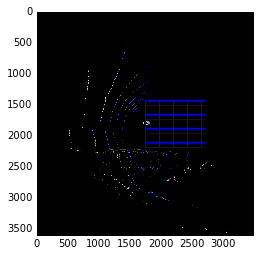

In [27]:
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[390, 650], 
                    xy_window=(128, 128), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
        
    xy_enlarge = 2
    
    window_list = []    
    for i in range(1,xy_enlarge):
        x_w = int(xy_window[0]*i)
        y_w = int(xy_window[1]*i)
        # Compute the span of the region to be searched    
        xspan = x_start_stop[1] - x_start_stop[0]
        yspan = y_start_stop[1] - y_start_stop[0]
        # Compute the number of pixels per step in x/y
        nx_pix_per_step = np.int(x_w*(1 - xy_overlap[0]))
        ny_pix_per_step = np.int(y_w*(1 - xy_overlap[1]))
        # Compute the number of windows in x/y
        nx_buffer = np.int(x_w*(xy_overlap[0]))
        ny_buffer = np.int(y_w*(xy_overlap[1]))
        nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
        ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
        # Initialize a list to append window positions to
        # Loop through finding x and y window positions
        # Note: you could vectorize this step, but in practice
        # you'll be considering windows one by one with your
        # classifier, so looping makes sense
        range_ = 9
        for ys in range(range_):
            for xs in range(nx_windows):
                # Calculate window position
                startx = xs*nx_pix_per_step + x_start_stop[0]
                endx = startx + x_w
                starty = ys*ny_pix_per_step + y_start_stop[0]
                endy = starty + y_w

                # Append window position to list
                window_list.append(((startx, starty), (endx, endy)))
#         y_start_stop[0] += np.int(ny_pix_per_step/2)
        x_start_stop[0] -= np.int(nx_pix_per_step*2)
        x_start_stop[1] += np.int(nx_pix_per_step*2)
    # Return the list of windows
    return window_list

# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy


# if camera view is 30 degrees, tan(30) = 0.58, 

global_windows = slide_window(img_full, x_start_stop=[int(img_full.shape[1]*0.5), int(0.8*img_full.shape[1])],
                              y_start_stop=[int(img_full.shape[0]*0.4), int(0.6*img_full.shape[0])], 
                    xy_window=(150, 150), xy_overlap=(0.5, 0.5))
print("windows_n:",len(global_windows))

box_img_sample = draw_boxes(img_full, global_windows)
plt.imshow(box_img_sample)
# plt.imsave("all_boxes_covered.png",box_img)

# This is where I am right now for image classification, I'm trying to move to the second part at the bottom extracting position values for classification since we need multiple pipelines running in tangent and pooling their results

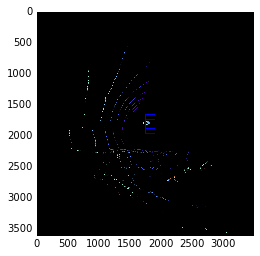

In [18]:
from multiprocessing.dummy import Pool as ThreadPool 
# current_img = img_full

def pred_window(window):
    
    global current_img
    img = current_img
#     print(window)
    try:
        window_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (150, 150))
        window_img = window_img.transpose([2,0,1])
        window_img = window_img.reshape((1,)+window_img.shape)

        cnn_prediction = cnn.predict(window_img)

        if cnn_prediction < 0.1:
            return True
    except:
        print("error here")
    return False

# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img):
    
    global current_img
    global global_windows
    
    current_img = img
    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    pos_preds = []
    for window in global_windows:
        pos_preds.append(pred_window(window))
        
#     pool = ThreadPool(20) 
#     pos_preds = pool.map(pred_window, global_windows)
    
#     #close the pool and wait for the work to finish 
#     pool.close() 
#     pool.join() 
    
    for i in range(len(pos_preds)):
        if pos_preds[i] == True:
            on_windows.append(global_windows[i])
        
    #8) Return windows for positive detections
    return on_windows


#sample image parameters

image = np.copy(img_full)
draw_image = np.copy(image)

image = image.astype(np.float32)/255

hot_windows = search_windows(img_full)      

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)
# plt.imsave("output_image.png", window_img)

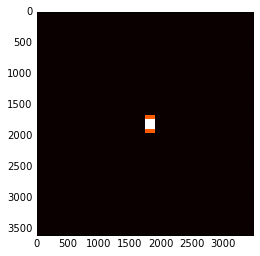

In [62]:
from scipy.ndimage.measurements import label

# Function to add "heat" but adding 1 to the concerned area
def add_heat(heatmap, bbox_list=hot_windows):
    # Iterate through list of bboxes
    
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
# Function that applies a threshold to the heatmap but removing values below a given threshold value
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

# Draw the positive labeled boxes for the final output image to be processed
def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        
        #original window parameters
        x1 = np.min(nonzerox)
        x2 = np.max(nonzerox)
        y1 = np.min(nonzeroy)
        y2 = np.max(nonzeroy)
        
        # draw original rectangle detected
        cv2.rectangle(img, (x1,y1), (x2,y2), (100,100,200), 6)
   

        # Return the image
    return img

heat = np.zeros_like(image[:,:,0]).astype(np.float)
# Add heat to each box in box list
heat = add_heat(heat,hot_windows)
    
# Apply threshold to help remove false positives
# The threshold value used is just for visualisation and should be changed to an optimal value
heat = apply_threshold(heat,0)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)

plt.imshow(heatmap, cmap='hot')

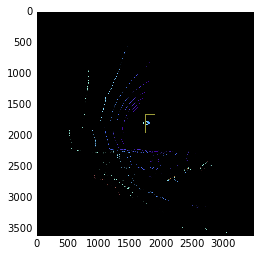

In [21]:
plt.imshow(draw_img)
# plt.imsave("boxes_image.png",draw_img)

In [63]:
def pipeline(img):
    
    image = np.copy(img)
    
    draw_image = np.copy(image)

    image = image.astype(np.float32)/255

    hot_windows = search_windows(img)      

    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                  

    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat,hot_windows)

    # Apply threshold to help remove false positives
    # The threshold value used is just for visualisation and should be changed to an optimal value
    heat = apply_threshold(heat,2)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    
#     plt.imshow(draw_img)
    return draw_img
    

    
    

In [64]:
import glob
full_imgs = glob.glob("./out_bextraction/*.png")
full_imgs = sorted(full_imgs)
print(len(full_imgs))

75


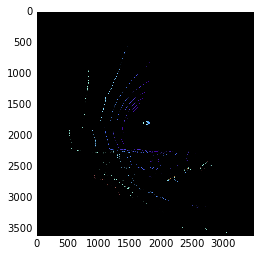

In [65]:
plt.imshow(pipeline(cv2.imread("/media/da7th/My_Passport/Udacity/DidiChallengeData/Didi-Release-2/Data/1/Untitled Folder/out_bextraction/img_22.png")))

In [66]:
count = 0

for img in full_imgs:
    img = cv2.imread(img)
    new_img = pipeline(img)
    count += 1
    plt.imsave("./boxes_found/new_img_" + str(count) + ".png", new_img, (15,15))
    

In [42]:
from PIL import Image

In [59]:
# def extract_video(full_imgs):

# #     print "Processing images to video..."
#     cwd = os.getcwd()
#     # SETTINGS FOR SAVING OUTPUT VIDEO
#     out_file = cwd + "/out_video.avi"  # Filepath to save the video as
#     fourcc = cv2.VideoWriter_fourcc(*'XVID')
#     out_vid_dims = (500, 500)
#     fps_ = 24  # adjust based on input video

#     coloring = True
#     out = cv2.VideoWriter(out_file,
#                           fourcc=fourcc,
#                           fps=fps_,
#                           frameSize=out_vid_dims,
#                           isColor=coloring)

#     for img in full_imgs:
#         img = cv2.imread(img)
#         out.write(img)
        
#     out.release()
# #     print "Done.\nVideo saved to", directory + "/..."

In [60]:
# full_imgs = glob.glob("./boxes_found/*.png")
# extract_video(full_imgs)

In [52]:
print (dir(cv2))

['', 'ACCESS_FAST', 'ACCESS_MASK', 'ACCESS_READ', 'ACCESS_RW', 'ACCESS_WRITE', 'ADAPTIVE_THRESH_GAUSSIAN_C', 'ADAPTIVE_THRESH_MEAN_C', 'AGAST_FEATURE_DETECTOR_AGAST_5_8', 'AGAST_FEATURE_DETECTOR_AGAST_7_12D', 'AGAST_FEATURE_DETECTOR_AGAST_7_12S', 'AGAST_FEATURE_DETECTOR_NONMAX_SUPPRESSION', 'AGAST_FEATURE_DETECTOR_OAST_9_16', 'AGAST_FEATURE_DETECTOR_THRESHOLD', 'AKAZE_DESCRIPTOR_KAZE', 'AKAZE_DESCRIPTOR_KAZE_UPRIGHT', 'AKAZE_DESCRIPTOR_MLDB', 'AKAZE_DESCRIPTOR_MLDB_UPRIGHT', 'AKAZE_create', 'AgastFeatureDetector_AGAST_5_8', 'AgastFeatureDetector_AGAST_7_12d', 'AgastFeatureDetector_AGAST_7_12s', 'AgastFeatureDetector_NONMAX_SUPPRESSION', 'AgastFeatureDetector_OAST_9_16', 'AgastFeatureDetector_THRESHOLD', 'AgastFeatureDetector_create', 'BFMatcher', 'BFMatcher_create', 'BORDER_CONSTANT', 'BORDER_DEFAULT', 'BORDER_ISOLATED', 'BORDER_REFLECT', 'BORDER_REFLECT101', 'BORDER_REFLECT_101', 'BORDER_REPLICATE', 'BORDER_TRANSPARENT', 'BORDER_WRAP', 'BOWImgDescriptorExtractor', 'BOWKMeansTrainer', 

# Extracting coordinate features

In [7]:
reset_points()

In [8]:
print ("x-axes limits: ", min(x_s), max(x_s), len(x_s))
print ("y-axes limits: ", min(y_s), max(y_s), len(y_s))
print ("z-axes limits: ", min(z_s), max(z_s), len(z_s))
print ("i-axes limits: ", min(i_s), max(i_s), len(i_s))
print ("r-axes limits: ", min(r_s), max(r_s), len(r_s))

x-axes limits:  -24.9980773926 24.9458007812 26157
y-axes limits:  -24.9329032898 24.957654953 26157
z-axes limits:  -4.06669044495 0.263134986162 26157
i-axes limits:  1.0 48.0 26157
r-axes limits:  32.0 62.0 26157


# Huh..........?

In [9]:
#done this way because del_ rearranges the array, error will be: Error: out of index!
reset_points()
del_indeces = []
del_count = 0

print(len(z_s))

for i in range(len(z_s)):
    if z_s[i] > 0.8 or z_s[i] < -1.30:
        del_indeces.append(i-del_count)
        del_count += 1
        
for index in del_indeces:
    del z_s[index], x_s[index], y_s[index], i_s[index], r_s[index]

26157


In [10]:
print ("x-axes limits: ", min(x_s), max(x_s), len(x_s))
print ("y-axes limits: ", min(y_s), max(y_s), len(y_s))
print ("z-axes limits: ", min(z_s), max(z_s), len(z_s))
print ("i-axes limits: ", min(i_s), max(i_s), len(i_s))
print ("r-axes limits: ", min(r_s), max(r_s), len(r_s))

x-axes limits:  -24.9980773926 14.67137146 19914
y-axes limits:  -11.1919641495 12.1883716583 19914
z-axes limits:  -1.29990530014 0.263134986162 19914
i-axes limits:  1.0 48.0 19914
r-axes limits:  32.0 62.0 19914


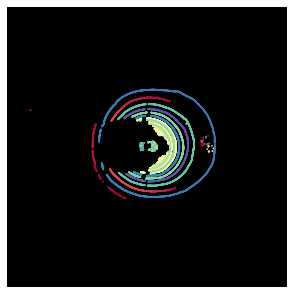

In [11]:
%matplotlib inline

fig = plt.figure(frameon = False, figsize=(5,5))
cm = plt.cm.get_cmap('Spectral')
sc = plt.scatter(x_s, y_s, c=z_s, s=3, edgecolors= '', cmap=cm)
# plt.axis('square')
ax = plt.gca()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.patch.set_facecolor('black')
ax.set_xlim([-30,30])
ax.set_ylim([-30,30])
# plt.colorbar(sc)
plt.savefig("croppable_img.png", bbox_inches='tight', dpi=200, pad_inches=0.0)
plt.show()

In [54]:
# reset_points()

all_clusters = []

x_s2 = list(x_s)

count = 0

for x1 in range(len(x_s)):
    cluster = []
    popping = []
    for x2 in range(len(x_s2)):
        if np.abs(x_s[x1]-x_s2[x2]) <= 3 and np.abs(y_s[x1]-x_s2[x2]) <= 3:
            cluster.append(x2)
            popping.append(x2)
    
    np.delete(x_s2, popping)
    
    all_clusters.append(cluster)
    
    if x1%(len(x_s)/10) == 0:
        print(count, " %")
        count += 10

0  %
10  %
20  %
30  %
40  %
50  %
60  %
70  %
80  %
90  %
100  %


In [70]:
clusters = []
for cluster in all_clusters:
    if len(cluster) > 35:
        clusters.append(cluster)
    

In [71]:
print(len(x_s))
print(len(all_clusters))
print(len(clusters))

9882
9882
5141


In [72]:
xcluster = []
ycluster = []
zcluster = []
icluster = []
rcluster = []

for i in range(len(clusters)):
    for index in clusters[i]:
        xcluster.append(x_s[index])
        ycluster.append(y_s[index])
        zcluster.append(z_s[index])
        icluster.append(i_s[index])
        rcluster.append(r_s[index])

In [73]:
%matplotlib inline

fig = plt.figure(frameon = False, figsize=(5,5))
cm = plt.cm.get_cmap('Spectral')
sc = plt.scatter(xcluster, ycluster, c=zcluster, s=3, edgecolors= '', cmap=cm)
# plt.axis('square')
ax = plt.gca()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.patch.set_facecolor('black')
ax.set_xlim([-30,30])
ax.set_ylim([-30,30])
# plt.colorbar(sc)
# plt.savefig("croppable_img.png", bbox_inches='tight', dpi=200, pad_inches=0.0)
plt.show()

KeyboardInterrupt: 

In [ ]:
i = 0

In [ ]:
xcluster = []
ycluster = []
zcluster = []
icluster = []
rcluster = []

for index in clusters[i]:
    xcluster.append(x_s[index])
    ycluster.append(y_s[index])
    zcluster.append(z_s[index])
    icluster.append(i_s[index])
    rcluster.append(r_s[index])
    
i += 1

%matplotlib inline

fig = plt.figure(frameon = False, figsize=(5,5))
cm = plt.cm.get_cmap('Spectral')
sc = plt.scatter(xcluster, ycluster, c=zcluster, s=3, edgecolors= '', cmap=cm)
# plt.axis('square')
ax = plt.gca()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.patch.set_facecolor('black')
ax.set_xlim([-30,30])
ax.set_ylim([-30,30])
# plt.colorbar(sc)
# plt.savefig("croppable_img.png", bbox_inches='tight', dpi=200, pad_inches=0.0)
plt.show()

In [ ]:
print(i)